This is a simple tutorial on Logistic Regression.Here the dataset contains the Age,salary and the decision to purchase a particular Car.We will be using logistic regression to predict if a particular person will buy a car.This Kernel is work in process and I will be updating this in coming times.Please do vote if you find my work useful.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Social_Network.csv']


**1.Importing the Python Modules **

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') 

**2.Importing the Dataset**

In [3]:
dataset=pd.read_csv('../input/Social_Network.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


So we have the User ID, Gender,Age,Salary  and the data if Purchase made by a used.

**3.Generating Array of Features and Target Values **

In [4]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

**4.Splitting the dataset to Train and Test Set **

In [5]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

**5.Feature Scaling **

In [6]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

**6.Fitting Logistic Regression into Training set **

In [7]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**7.Predicting the test set results **

In [8]:
y_pred=classifier.predict(X_test)

**8.Making the confusion matrix**

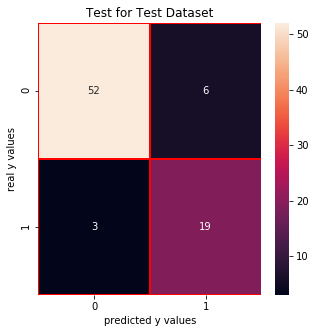

In [9]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()


Correct predictions =52+19=71
Wrong predictions =3+6=9

**9.Visualizing the Training Set Results **

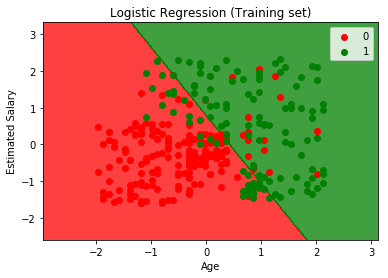

In [10]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**10.Visualizing the Test Set Results **

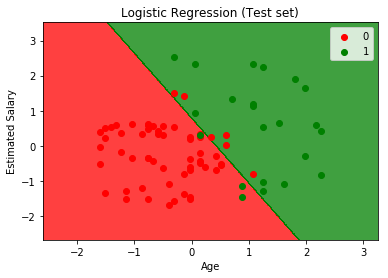

In [11]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Red area represent the people who didnt buy the car.Green area represent people who brought the car.